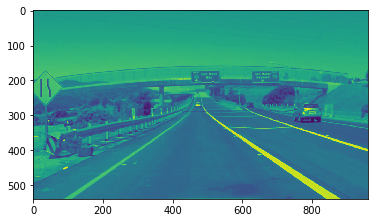

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
import scipy.misc as scm

# Getting the picture edited with Canny edges
image = mpimg.imread('../images/exit-ramp.jpg')
gray = cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)
plt.imshow(gray)
plt.show()

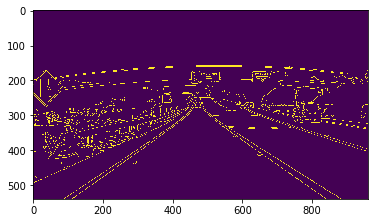

In [65]:
# Using Canny for edge detection, se second demo
kernel_size = 5
blur_gray = cv2.GaussianBlur(gray,(kernel_size, kernel_size),0)
low_threshold = 50
high_threshold = 150
edges = cv2.Canny(blur_gray, low_threshold, high_threshold)
plt.imshow(edges)
plt.show()

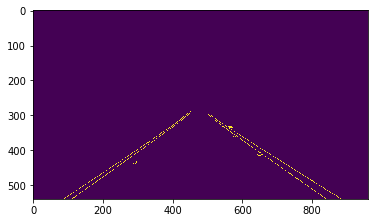

In [66]:
# Creating masked edges image using cv2.fillPoly()
mask = np.zeros_like(edges)
ignore_mask_color = 255
imshape = image.shape
verticles = np.array([[(50,imshape[0]),(450, 290), (490, 290), (960,imshape[0])]], dtype=np.int32)
cv2.fillPoly(mask, verticles, ignore_mask_color)
masked_edges = cv2.bitwise_and(edges, mask)

# Showing masked edges
plt.imshow(masked_edges)
plt.show()

In [67]:
# Defining Hough transform parameters
rho = 2
theta = np.pi/180
threshold = 15
min_line_length= 40
max_line_gap = 20
line_image = np.copy(image)*0

In [68]:
# Running Hough on edge detected image
lines = cv2.HoughLinesP(masked_edges, rho, theta, threshold, np.array([]), min_line_length, max_line_gap)

# Iterating over the output "lines" and drawing lines on the blank
for line in lines:
    for x1,y1,x2,y2 in line:
        cv2.line(line_image,(x1,y1),(x2,y2),(255,0,0),10)

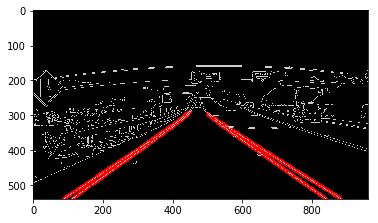

In [69]:
# Creating a "color" binary image to combine with line image
color_edges = np.dstack((edges, edges, edges))

# Drawing the lines on the edge image
combo = cv2.addWeighted(color_edges, 0.8, line_image, 1, 0)
plt.imshow(combo)
plt.show()

In [70]:
# Did this the first time to make the line picture
#scm.imsave('extracted-lines.jpg', combo)